# Examen Parcial n°1 2da Parte - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).


### Criterios de Evaluación:

1. No esta permitido el uso de IAs durante el examen. (Desactivar Copilot o cualquier herramienta de IA para autocompletar codigo.)

2. Se deben utilizar nombres de variables descriptivos y claros (Utilizar la nomeclatura correspondiente para los nombres de variables).

3. Comentarios claros y concisos que expliquen el propósito de cada sección del código en una celda de markdown antes del código.

4. Utilizar mensajes de commit descriptivos. (Puedes utilizar la extension CONVENTIONAL COMMIT de VS-CODE).

5. Entrega en tiempo y forma (Parciales entregados fuera de hora o con commits pasados el horario de entrega quedará invalidado.)

6. Todo el código desarrollado debe ser subido a un repositorio en GitHub (el nombre del repositorio de seguir la siguiente estructura: 
**parcial1_tlp3_nombre_apellido**).

7. Para resolver las actividades se debe insertar casillas de codigo entre cada actividad del cuaderno de Jupyter.

8. Deben trabajar con el datasets adjunto.

9. Una vez finalizado el examen, los resultados deben quedar guardados debajo de cada celda (NO EJECUTAR LA OPCIÓN "borrar todas las salidas").

**Importante:** Una vez finalizado el examen, marcar como completado en el classroom.

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de VENTAS en un DataFrame.

In [67]:
import pandas as pd

df = pd.read_csv('./ventas.csv')


### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.


In [68]:
import pandas as pd

df = pd.read_csv('./ventas.csv')
#2.1
print('Primeras Filas')
print(df.head())

print('Ultimas Filas')
print(df.tail())
#2.2
print('Informaciòn del DF')
print(df.info())
#2.3
print('Conteo de valores Nulos')
print(df.isnull().sum())

Primeras Filas
   ID_Venta Nombre_Cliente Apellido_Cliente       Fecha  \
0         1            Ana           García  01-05-2024   
1         2         Carlos            López  2024-01-08   
2         3          sofía         martínez  2024-01-12   
3         4          pedro        rodríguez  2024-01-15   
4         5          Laura          Sánchez  18-01-2024   

                Producto  Cantidad  Precio_Unitario  Total_Venta  \
0                 Laptop         1          1200.50      1200.50   
1      Mouse Inalámbrico         2            25.75        51.50   
2       Teclado Mecánico         1            75.99        75.99   
3    Monitor 24 pulgadas         1              NaN          NaN   
4  Auriculares Bluetooth         1            99.95        99.95   

              Metodo_Pago Region  
0      Tarjeta de Crédito  Norte  
1                Efectivo    Sur  
2  Transferencia Bancaria   Este  
3       Tarjeta de Débito  Oeste  
4      Tarjeta de Crédito  Norte  
Ultimas Fil

### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)

In [82]:
import pandas as pd
import numpy as np

#3.1
df['Precio_Unitario'] = df['Precio_Unitario'].fillna(df['Precio_Unitario'].mean()).round()
df['Total_Venta'] = df['Total_Venta'].fillna(df['Total_Venta'].mean()).round()

print('Arreglado con Media y la fecha:')

#3.2
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce', dayfirst=True)
print(df.head())

#3.3


Arreglado con Media y la fecha:
   ID_Venta Nombre_Cliente Apellido_Cliente      Fecha               Producto  \
0         1            Ana           García 2024-05-01                 Laptop   
1         2         Carlos            López        NaT      Mouse Inalámbrico   
2         3          sofía         martínez        NaT       Teclado Mecánico   
3         4          pedro        rodríguez        NaT    Monitor 24 pulgadas   
4         5          Laura          Sánchez 2024-01-18  Auriculares Bluetooth   

   Cantidad  Precio_Unitario  Total_Venta             Metodo_Pago Region  
0         1             1200       1200.0      Tarjeta de Crédito  Norte  
1         2               25         52.0                Efectivo    Sur  
2         1               75         76.0  Transferencia Bancaria   Este  
3         1              240        251.0       Tarjeta de Débito  Oeste  
4         1               99        100.0      Tarjeta de Crédito  Norte  


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

In [101]:
import pandas as pd

#4.1
print(df[['Precio_Unitario','Total_Venta']].describe())

#4.2
df.groupby('Producto')[['Precio_Unitario', 'Total_Venta']].agg(['mean', 'min', 'max', 'sum'])


       Precio_Unitario  Total_Venta
count            105.0   105.000000
mean             240.0   251.057143
std                0.0   353.944336
min              240.0     0.000000
25%              240.0    63.000000
50%              240.0   115.000000
75%              240.0   251.000000
max              240.0  1801.000000


Precio_Unitario                      Total_Venta  \
                                  mean    min    max    sum        mean   
Producto                                                                  
Altavoces Inteligentes           240.0  240.0  240.0  480.0        70.0   
Auriculares Bluetooth            240.0  240.0  240.0  480.0       140.0   
Auriculares Deportivos           240.0  240.0  240.0  240.0        76.0   
Auriculares In-Ear               240.0  240.0  240.0  240.0       100.0   
Auriculares Over-Ear             240.0  240.0  240.0  240.0       251.0   
...                                ...    ...    ...    ...         ...   
Teclado RGB                      240.0  240.0  240.0  240.0       110.0   
Teclado Retroiluminado           240.0  240.0  240.0  240.0        85.0   
Webcam 4K                        240.0  240.0  240.0  240.0        80.0   
Webcam Básica                    240.0  240.0  240.0  240.0        30.0   
Webcam HD                        240.0  240.0  240.0  240.0        46.0   

                                             
                          min    max    sum  
Producto                                     
Altavoces Inteligentes   70.0   70.0  140.0  
Auriculares Bluetooth   100.0  180.0  280.0  
Auriculares Deportivos   76.0   76.0   76.0  
Auriculares In-Ear      100.0  100.0  100.0  
Auriculares Over-Ear    251.0  251.0  251.0  
...                       ...    ...    ...  
Teclado RGB             110.0  110.0  110.0  
Teclado Retroiluminado   85.0   85.0   85.0  
Webcam 4K                80.0   80.0   80.0  
Webcam Básica            30.0   30.0   30.0  
Webcam HD                46.0   46.0   46.0  

[77 rows x 8 columns]


### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.

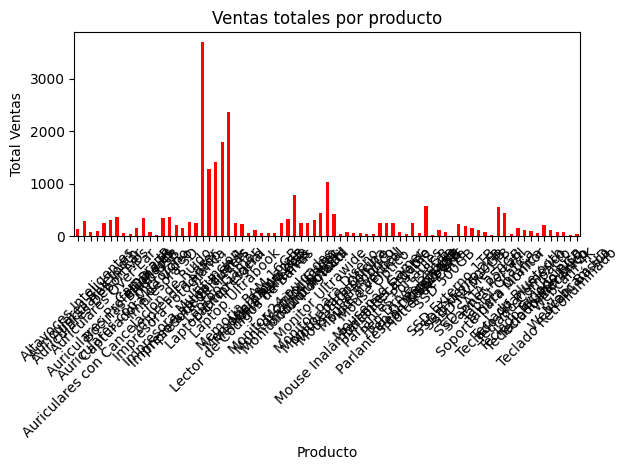

In [112]:
import matplotlib.pyplot as plt

ventas = df.groupby('Producto')['Total_Venta'].sum()
diez_productos = ventas.sort_values(ascending=False).head(10)

plt.Figure(figsize=(1,2))
ventas.plot(kind='bar', color='red')
plt.title('Ventas totales por producto')
plt.xlabel('Producto')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45,)
plt.tight_layout()
plt.show()



### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Deben hacer una conexión y hacer una consulta para ver si los datos fueron cargados correctamente.



In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('base_de_datos_examen.db')

df.to_sql('ventas', conn, if_exists='replace', index=False)

conn.close()